# Load all the data files

In [268]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [269]:
from google.colab import files
uploaded = files.upload()

Saving MJ8002_clean_TAC.csv to MJ8002_clean_TAC (1).csv
Saving SA0297_clean_TAC.csv to SA0297_clean_TAC (1).csv
Saving BK7610_clean_TAC.csv to BK7610_clean_TAC (1).csv
Saving BU4707_clean_TAC.csv to BU4707_clean_TAC (1).csv
Saving PC6771_clean_TAC.csv to PC6771_clean_TAC (1).csv
Saving CC6740_clean_TAC.csv to CC6740_clean_TAC (1).csv
Saving MC7070_clean_TAC.csv to MC7070_clean_TAC (1).csv
Saving JB3156_clean_TAC.csv to JB3156_clean_TAC (1).csv
Saving DC6359_clean_TAC.csv to DC6359_clean_TAC (1).csv
Saving HV0618_clean_TAC.csv to HV0618_clean_TAC (1).csv
Saving SF3079_clean_TAC.csv to SF3079_clean_TAC (1).csv
Saving DK3500_clean_TAC.csv to DK3500_clean_TAC (1).csv
Saving JR8022_clean_TAC.csv to JR8022_clean_TAC (1).csv


In [270]:
dfs = []
import io
import os

for filename, file_content in uploaded.items():
    df = pd.read_csv(io.StringIO(file_content.decode('utf-8')))
    df['pid'] = os.path.splitext(filename)[0].split('_')[0]
    dfs.append(df)

merged_df = pd.concat(dfs, ignore_index=True)

In [271]:
merged_df

,timestamp,TAC_Reading,pid
0,1493720054,-0.001385,MJ8002
1,1493721878,0.000864,MJ8002
2,1493722199,0.001913,MJ8002
3,1493722520,0.001333,MJ8002
4,1493722842,-0.000256,MJ8002
...,...,...,...
710,1493796643,0.012688,JR8022
711,1493798466,0.010780,JR8022
712,1493800288,0.008092,JR8022
713,1493802111,0.005726,JR8022


In [272]:
accelerometer_df = pd.read_csv('all_accelerometer_data_pids_13.csv')

In [273]:
#Changing the all acc data from miliseconds to seconds
accelerometer_df['time'] = pd.to_datetime(accelerometer_df['time']// 1000, unit='s')
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'], unit='s')

In [274]:
print(accelerometer_df.columns)
print(merged_df.columns)

Index(['time', 'pid', 'x', 'y', 'z'], dtype='object')
Index(['timestamp', 'TAC_Reading', 'pid'], dtype='object')


In [275]:
merged_df = pd.merge(accelerometer_df, merged_df, left_on=['pid', 'time'], right_on=['pid', 'timestamp'], how='inner')

In [277]:
merged_df

,time,pid,x,y,z,timestamp,TAC_Reading
0,2017-05-02 14:14:08,SA0297,0.131200,0.043200,0.003400,2017-05-02 14:14:08,0.032672
1,2017-05-02 14:14:08,SA0297,0.273400,0.119700,0.096800,2017-05-02 14:14:08,0.032672
2,2017-05-02 14:14:08,SA0297,0.151400,0.188600,0.037500,2017-05-02 14:14:08,0.032672
3,2017-05-02 14:14:08,SA0297,-0.091400,0.049600,0.053400,2017-05-02 14:14:08,0.032672
4,2017-05-02 14:14:08,SA0297,-0.793500,-0.518400,0.396700,2017-05-02 14:14:08,0.032672
...,...,...,...,...,...,...,...
6142,2017-05-03 11:09:10,CC6740,0.012896,-0.013732,0.604185,2017-05-03 11:09:10,0.005040
6143,2017-05-03 11:09:10,CC6740,-0.006422,0.023981,0.565886,2017-05-03 11:09:10,0.005040
6144,2017-05-03 11:09:10,CC6740,0.012401,0.004974,0.565885,2017-05-03 11:09:10,0.005040
6145,2017-05-03 11:09:10,CC6740,0.012559,0.005315,0.470111,2017-05-03 11:09:10,0.005040


In [278]:
merged_df = merged_df.drop('time', axis=1) #as time is same as timestamp

In [279]:
merged_df

,pid,x,y,z,timestamp,TAC_Reading
0,SA0297,0.131200,0.043200,0.003400,2017-05-02 14:14:08,0.032672
1,SA0297,0.273400,0.119700,0.096800,2017-05-02 14:14:08,0.032672
2,SA0297,0.151400,0.188600,0.037500,2017-05-02 14:14:08,0.032672
3,SA0297,-0.091400,0.049600,0.053400,2017-05-02 14:14:08,0.032672
4,SA0297,-0.793500,-0.518400,0.396700,2017-05-02 14:14:08,0.032672
...,...,...,...,...,...,...
6142,CC6740,0.012896,-0.013732,0.604185,2017-05-03 11:09:10,0.005040
6143,CC6740,-0.006422,0.023981,0.565886,2017-05-03 11:09:10,0.005040
6144,CC6740,0.012401,0.004974,0.565885,2017-05-03 11:09:10,0.005040
6145,CC6740,0.012559,0.005315,0.470111,2017-05-03 11:09:10,0.005040


# Resultant vector with x, y, z values


In [280]:
merged_df['resultant_vector'] = np.sqrt(merged_df['x']**2 + merged_df['y']**2 + merged_df['z']**2)

In [281]:
merged_df

,pid,x,y,z,timestamp,TAC_Reading,resultant_vector
0,SA0297,0.131200,0.043200,0.003400,2017-05-02 14:14:08,0.032672,0.138171
1,SA0297,0.273400,0.119700,0.096800,2017-05-02 14:14:08,0.032672,0.313761
2,SA0297,0.151400,0.188600,0.037500,2017-05-02 14:14:08,0.032672,0.244741
3,SA0297,-0.091400,0.049600,0.053400,2017-05-02 14:14:08,0.032672,0.116900
4,SA0297,-0.793500,-0.518400,0.396700,2017-05-02 14:14:08,0.032672,1.027498
...,...,...,...,...,...,...,...
6142,CC6740,0.012896,-0.013732,0.604185,2017-05-03 11:09:10,0.005040,0.604479
6143,CC6740,-0.006422,0.023981,0.565886,2017-05-03 11:09:10,0.005040,0.566430
6144,CC6740,0.012401,0.004974,0.565885,2017-05-03 11:09:10,0.005040,0.566042
6145,CC6740,0.012559,0.005315,0.470111,2017-05-03 11:09:10,0.005040,0.470309


# Visualizing Number of records in each PID


In [282]:
pid_counts = merged_df['pid'].value_counts()
pid_counts

pid
CC6740    831
PC6771    762
JB3156    720
BK7610    674
DK3500    637
HV0618    600
SA0297    396
SF3079    356
MJ8002    320
DC6359    304
BU4707    237
MC7070    191
JR8022    119
Name: count, dtype: int64

Text(0, 0.5, 'Record Count')

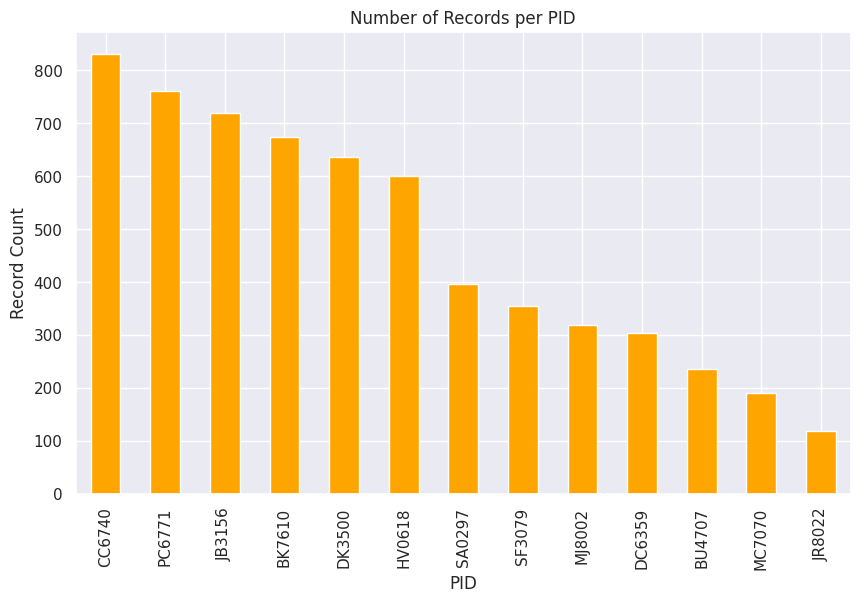

In [283]:
pid_counts.plot(kind='bar', color='orange', figsize=(10, 6))

plt.title('Number of Records per PID')
plt.xlabel('PID')
plt.ylabel('Record Count')

#Visualizing Accelerometer Reading and TAC Reading over time





<ipython-input-284-1d315f70b0d6>:6: RuntimeWarning: Second argument 'x' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[0].plot(t,"x",data=df__sa0297)
<ipython-input-284-1d315f70b0d6>:7: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data.  If it was intended as data, set the format string to an empty string to suppress this warning.  If it was intended as a format string, explicitly pass the x-values as well.  Alternatively, rename the entry in 'data'.
  ax[1].plot(t,"y",data=df__sa0297)


Text(0, 0.5, 'TAC Reading')

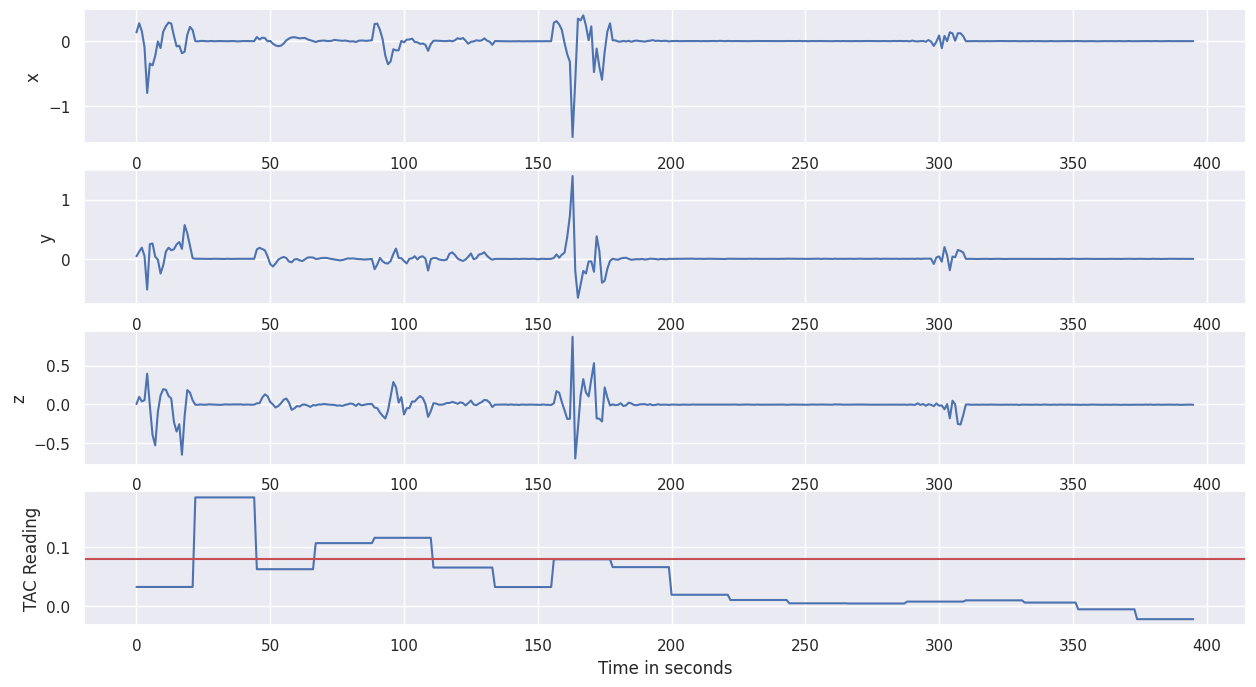

In [284]:
# for pid = 'SA0297'
df__sa0297 = merged_df[merged_df['pid'] == 'SA0297']
t=np.arange(df__sa0297['x'].size)
fig, ax=plt.subplots(4,figsize=(15,8))
plt.xlabel("Time in seconds")
ax[0].plot(t,"x",data=df__sa0297)
ax[1].plot(t,"y",data=df__sa0297)
ax[2].plot(t,"z",data=df__sa0297)
ax[3].plot(t,'TAC_Reading',data=df__sa0297)
ax[3].axhline(y=0.08,color='r',linestyle='-')
ax[0].set_ylabel('x')
ax[1].set_ylabel('y')
ax[2].set_ylabel('z')
ax[3].set_ylabel('TAC Reading')

#Visualizing Resultant Vector and TAC readings for all 13 pids

In [285]:
index_values = [x for x in merged_df.pid.value_counts().index]
print("Index Values:", index_values)

Index Values: ['CC6740', 'PC6771', 'JB3156', 'BK7610', 'DK3500', 'HV0618', 'SA0297', 'SF3079', 'MJ8002', 'DC6359', 'BU4707', 'MC7070', 'JR8022']


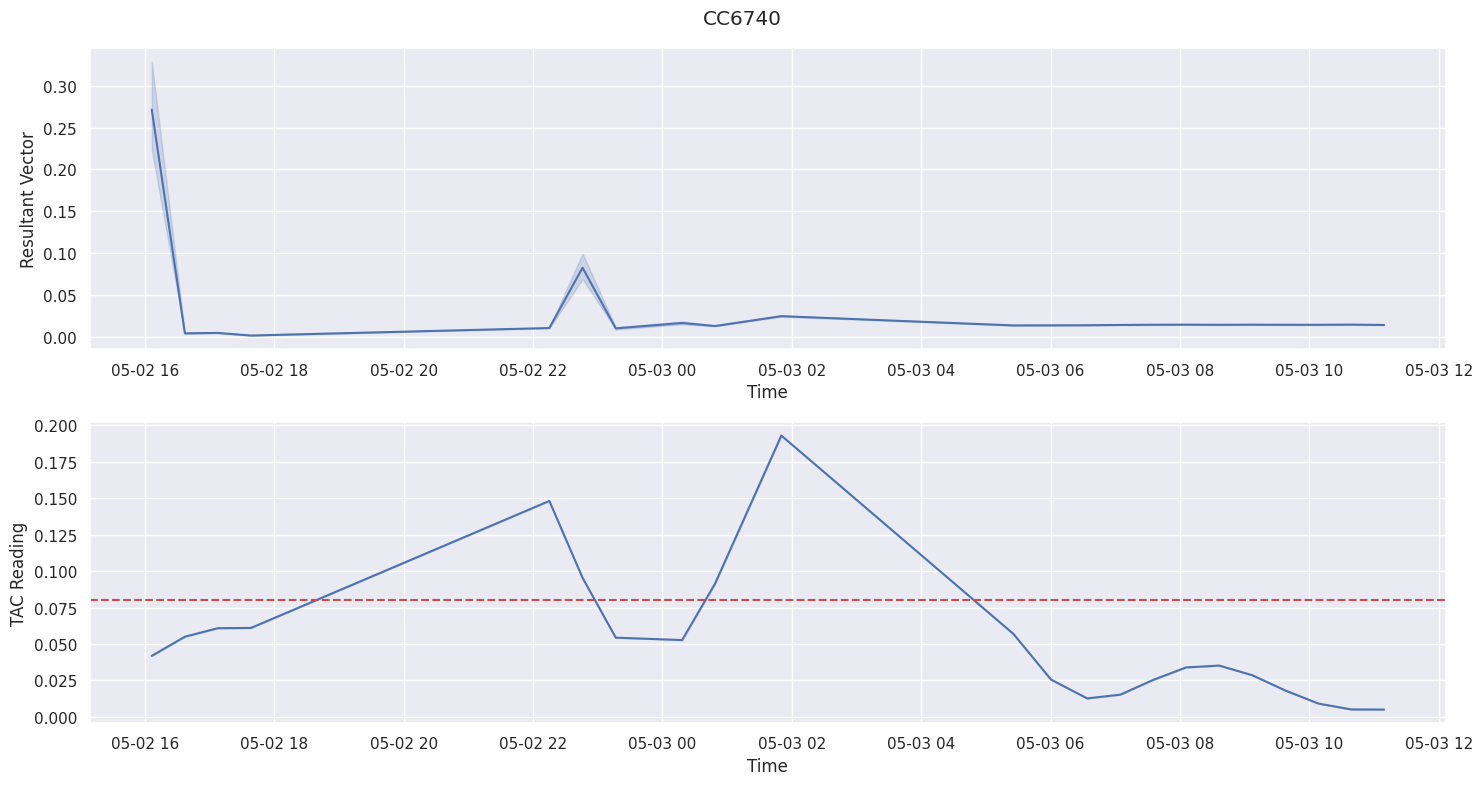

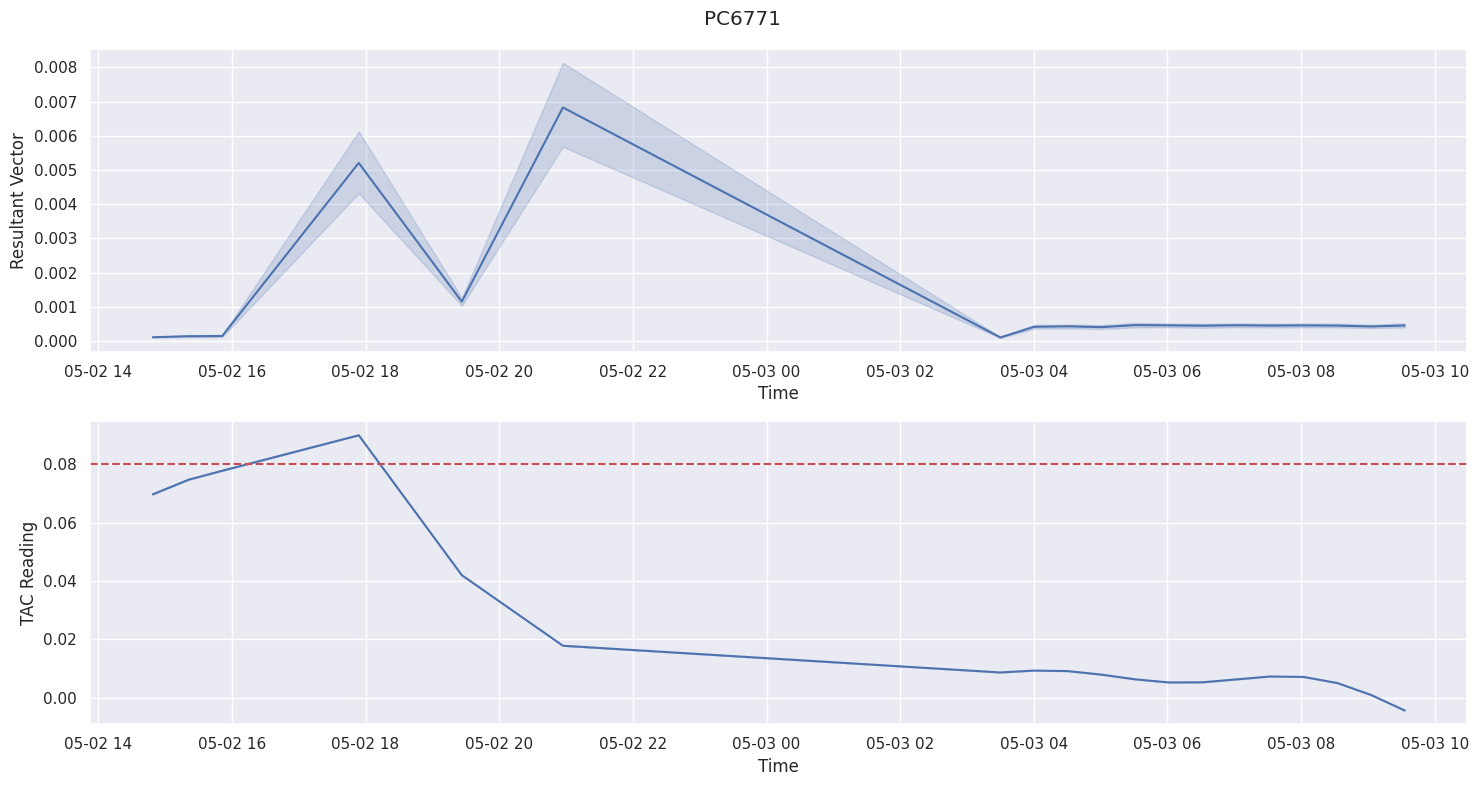

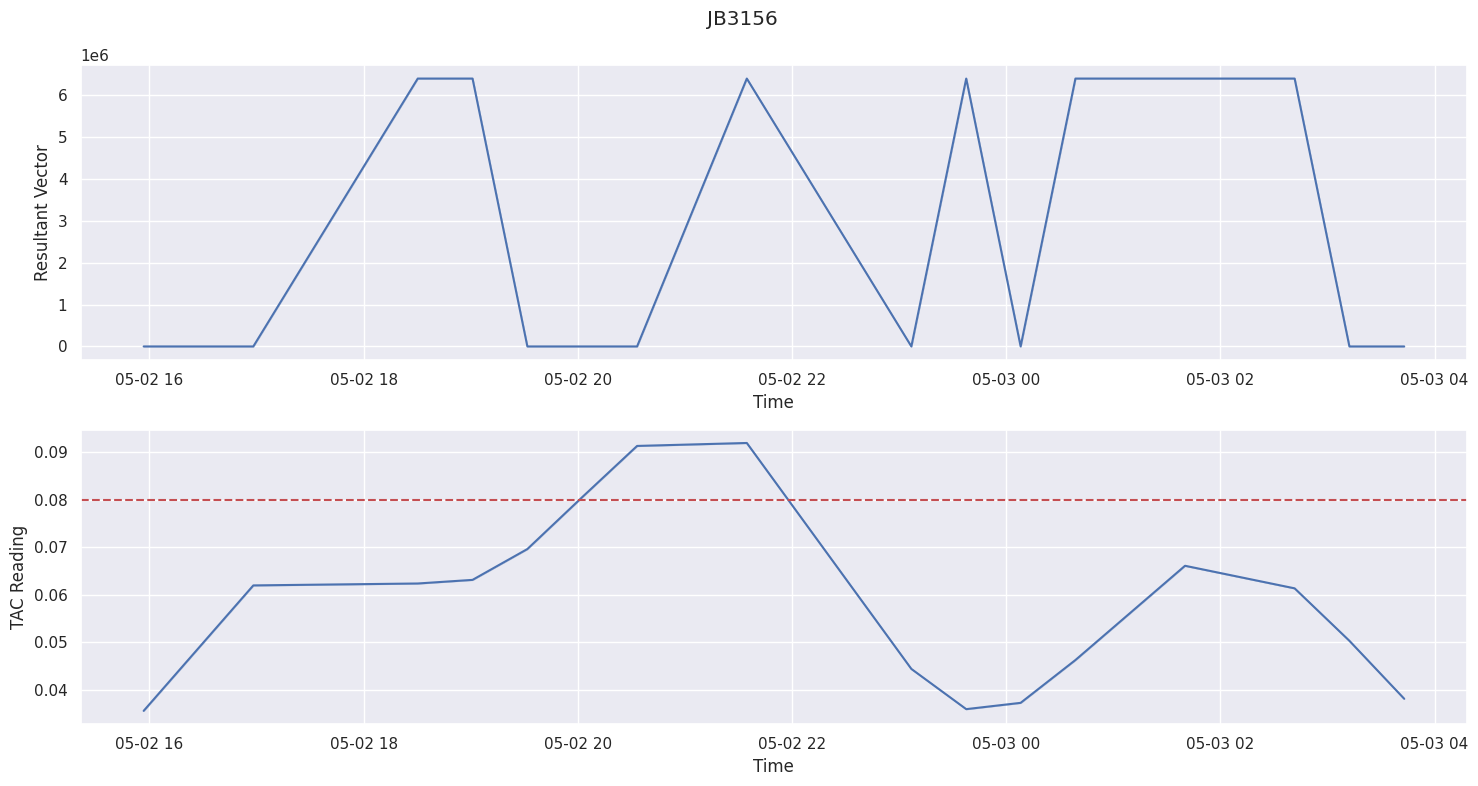

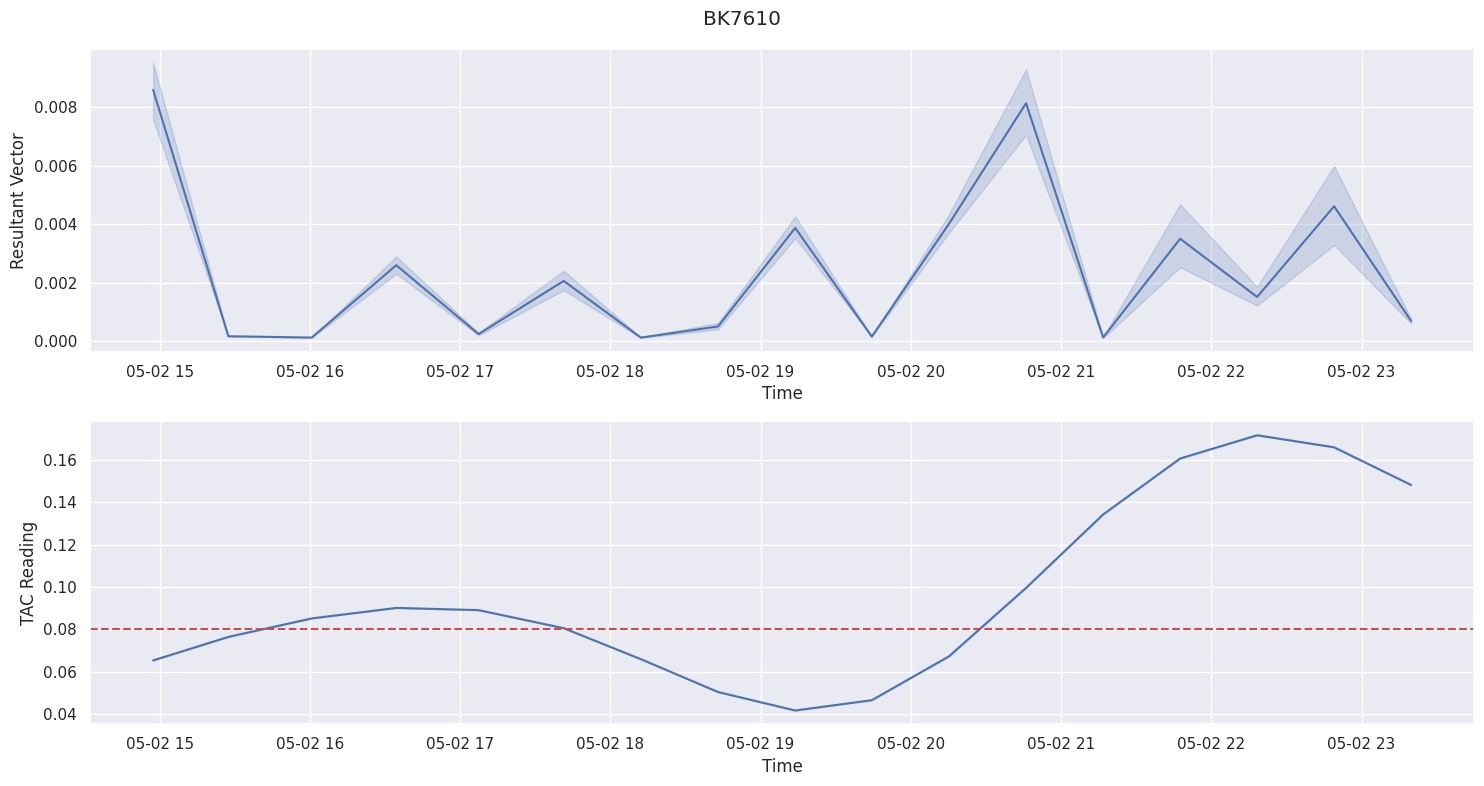

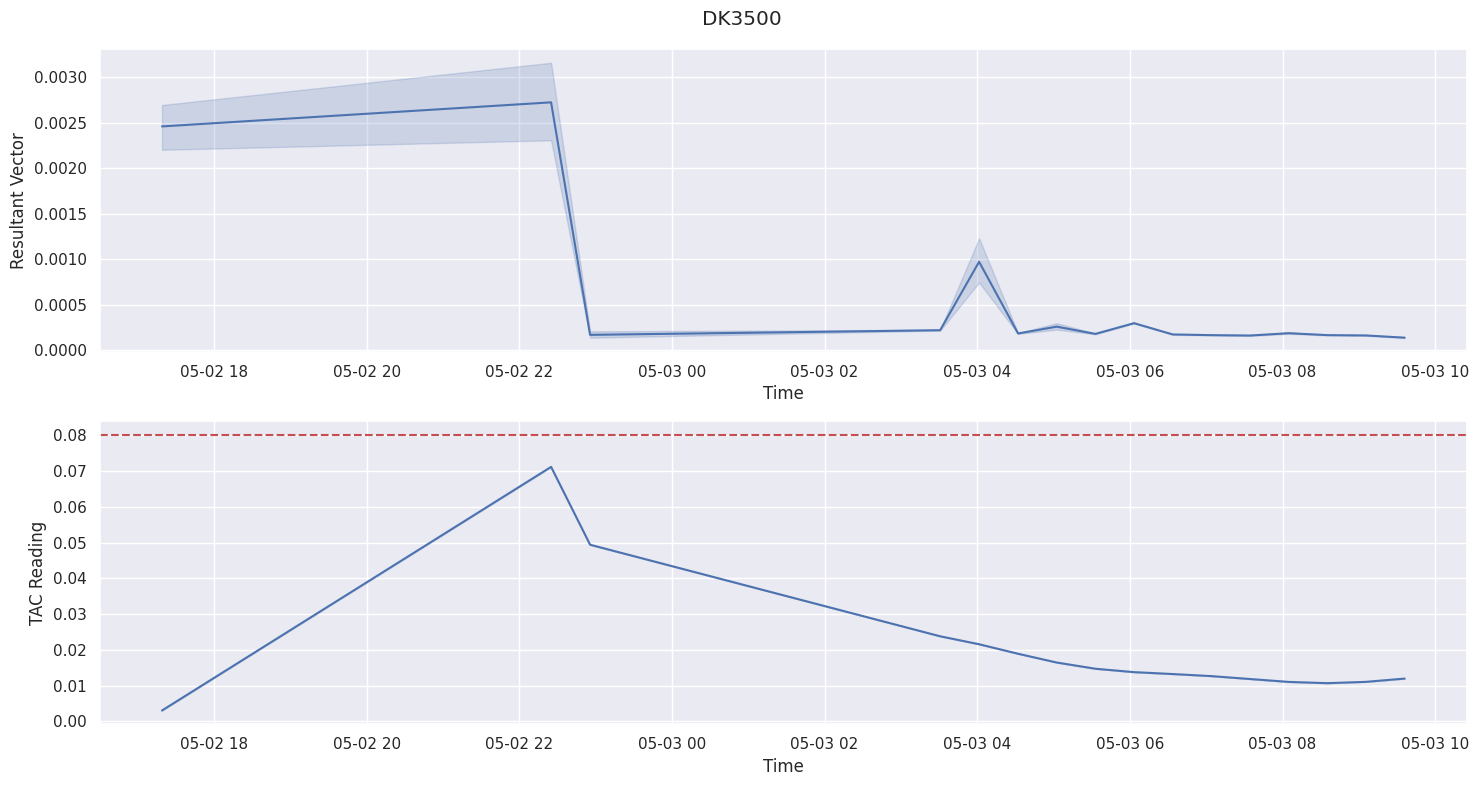

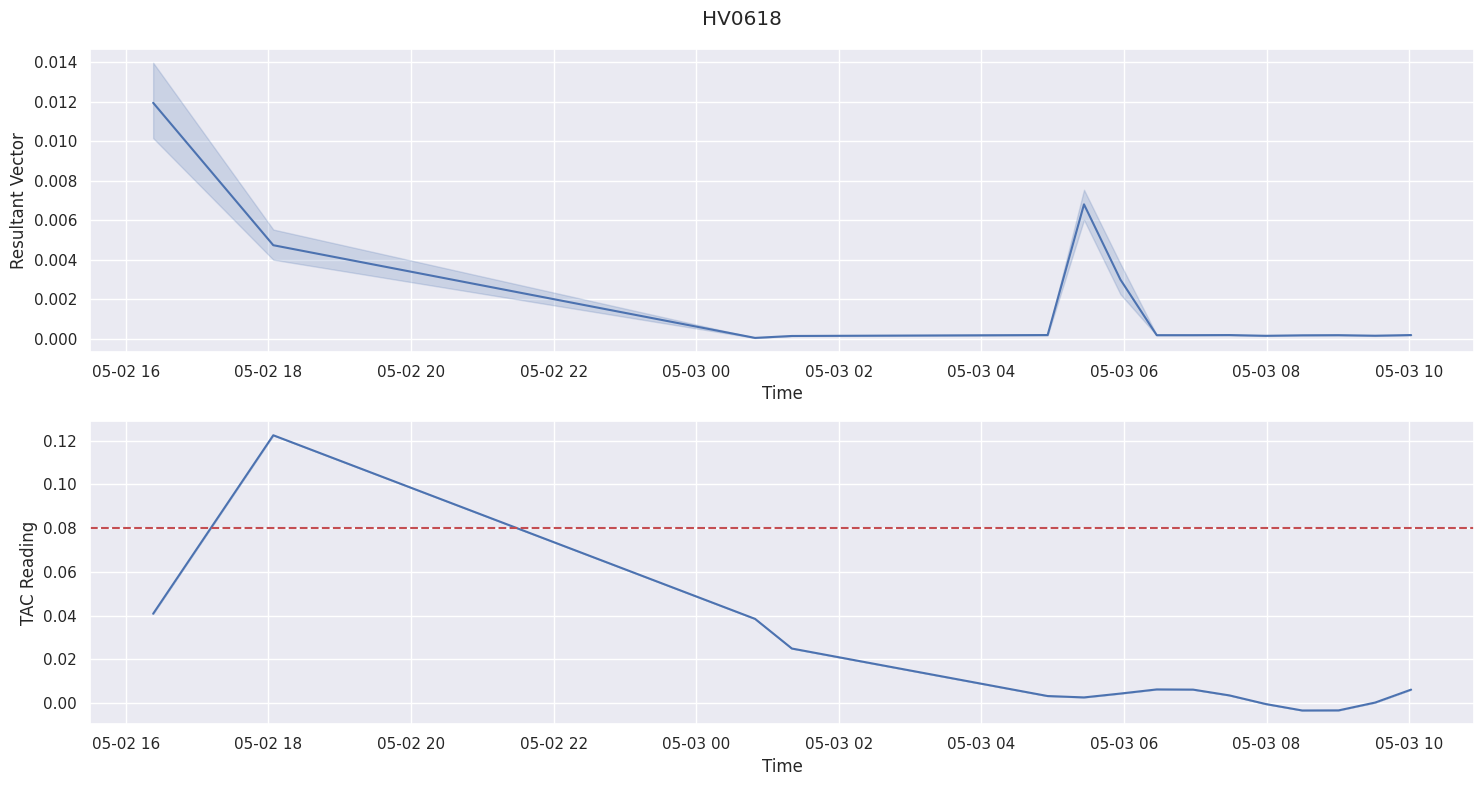

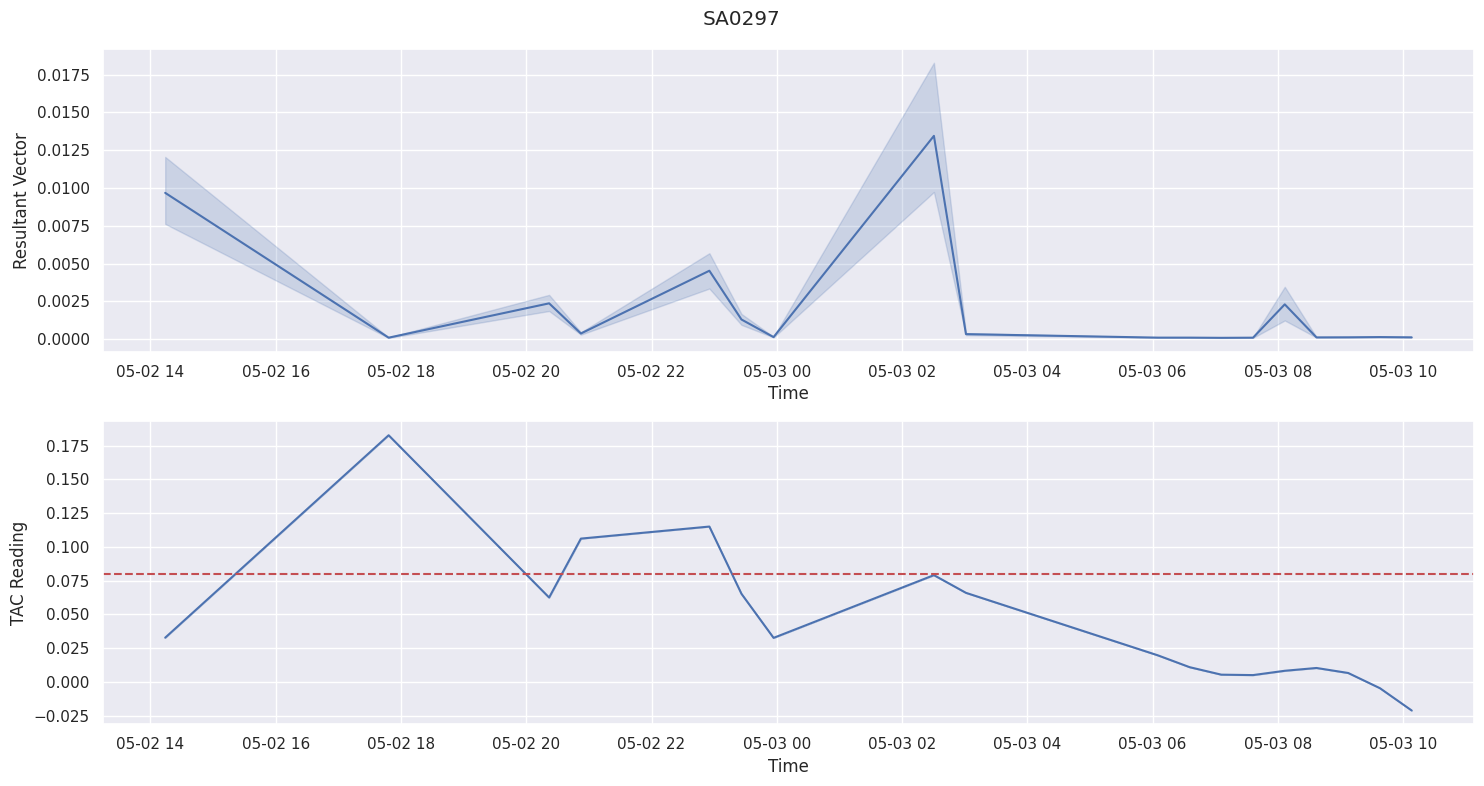

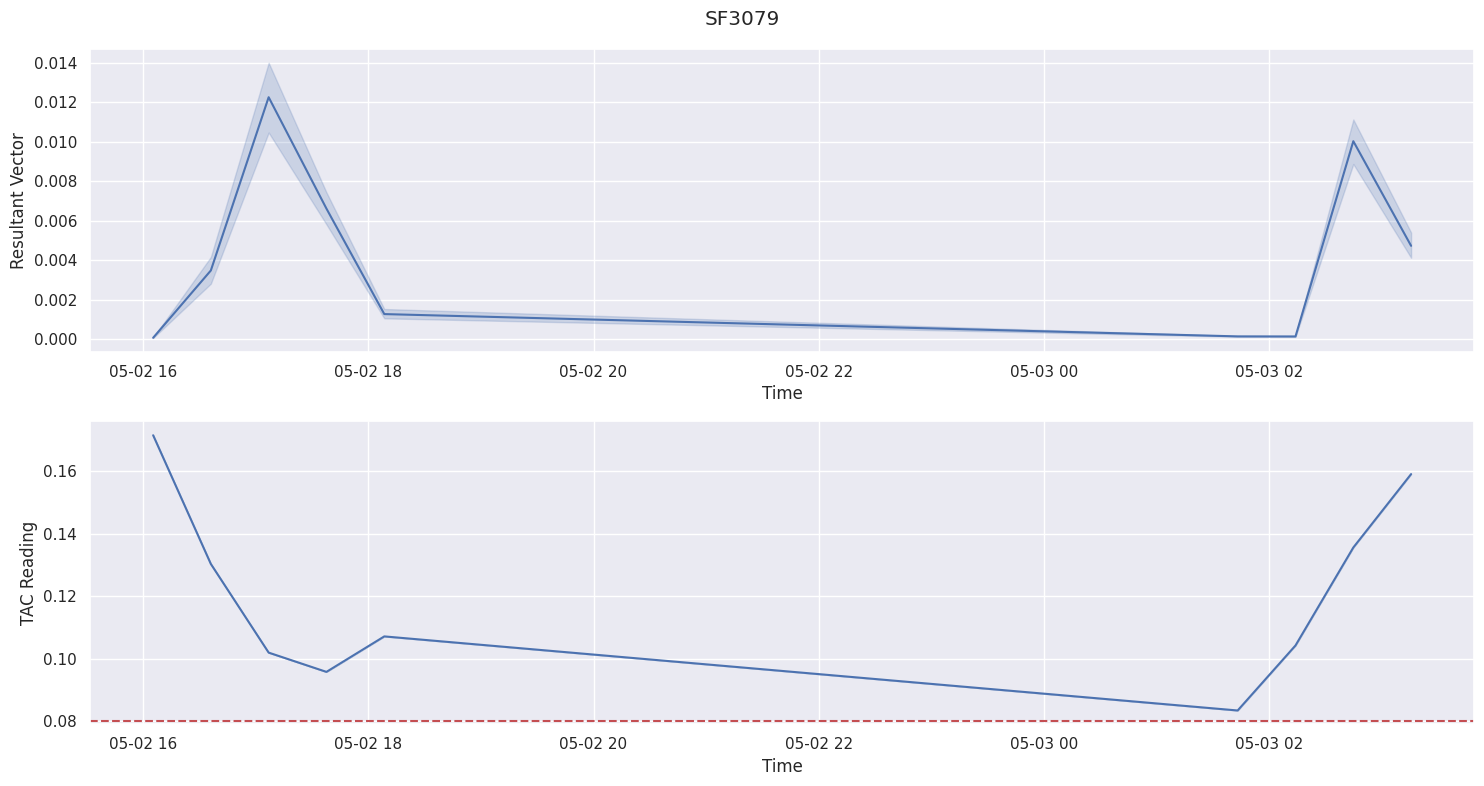

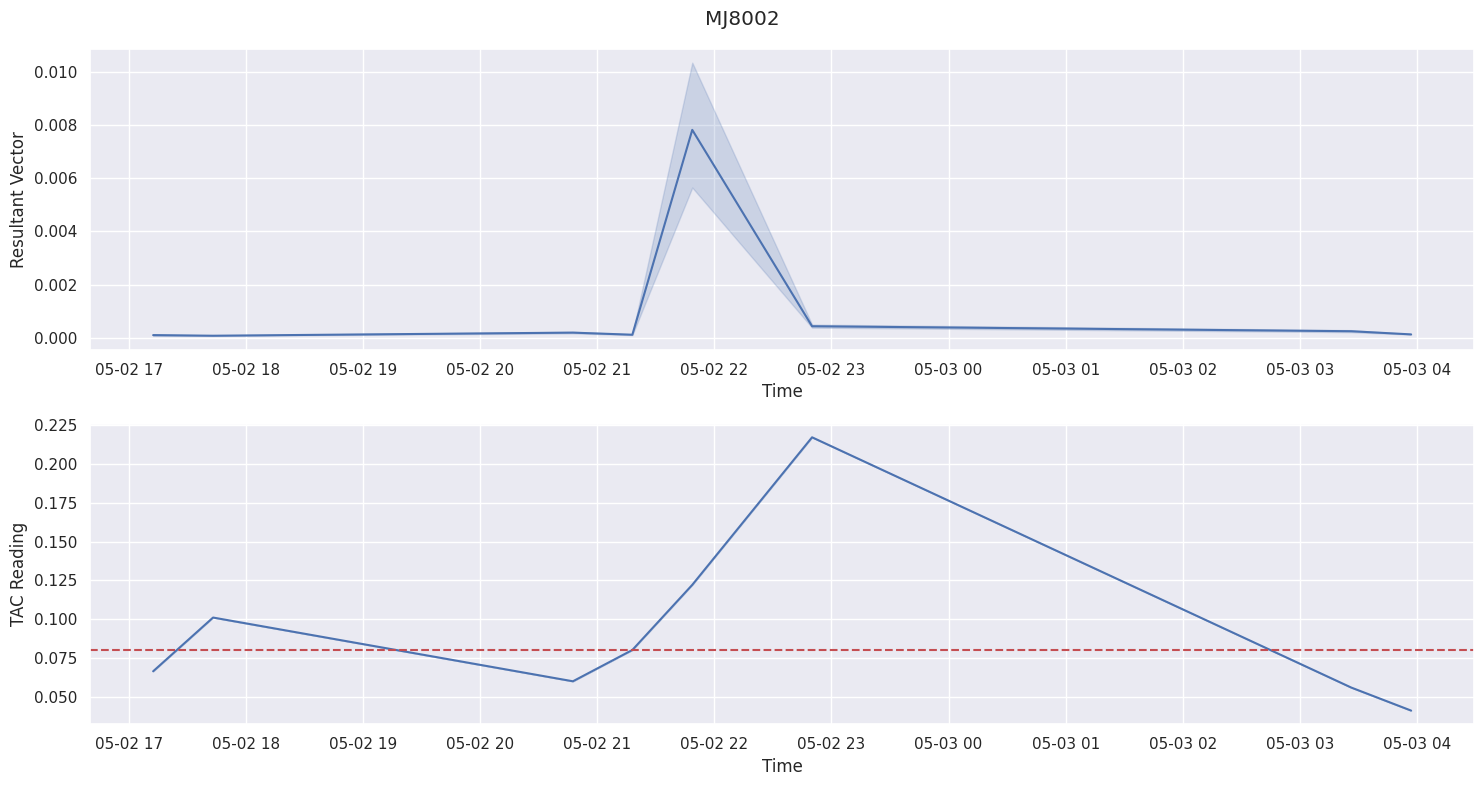

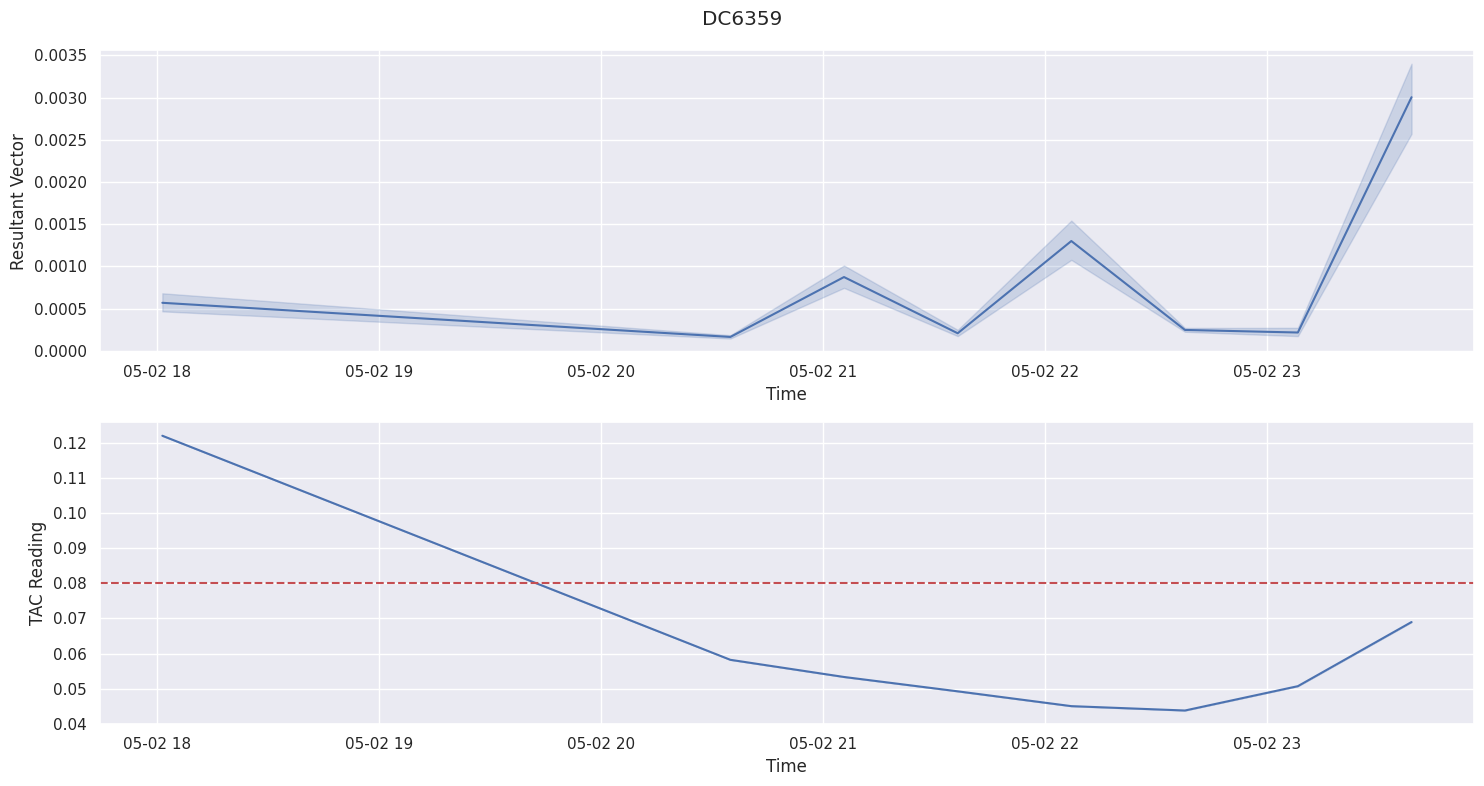

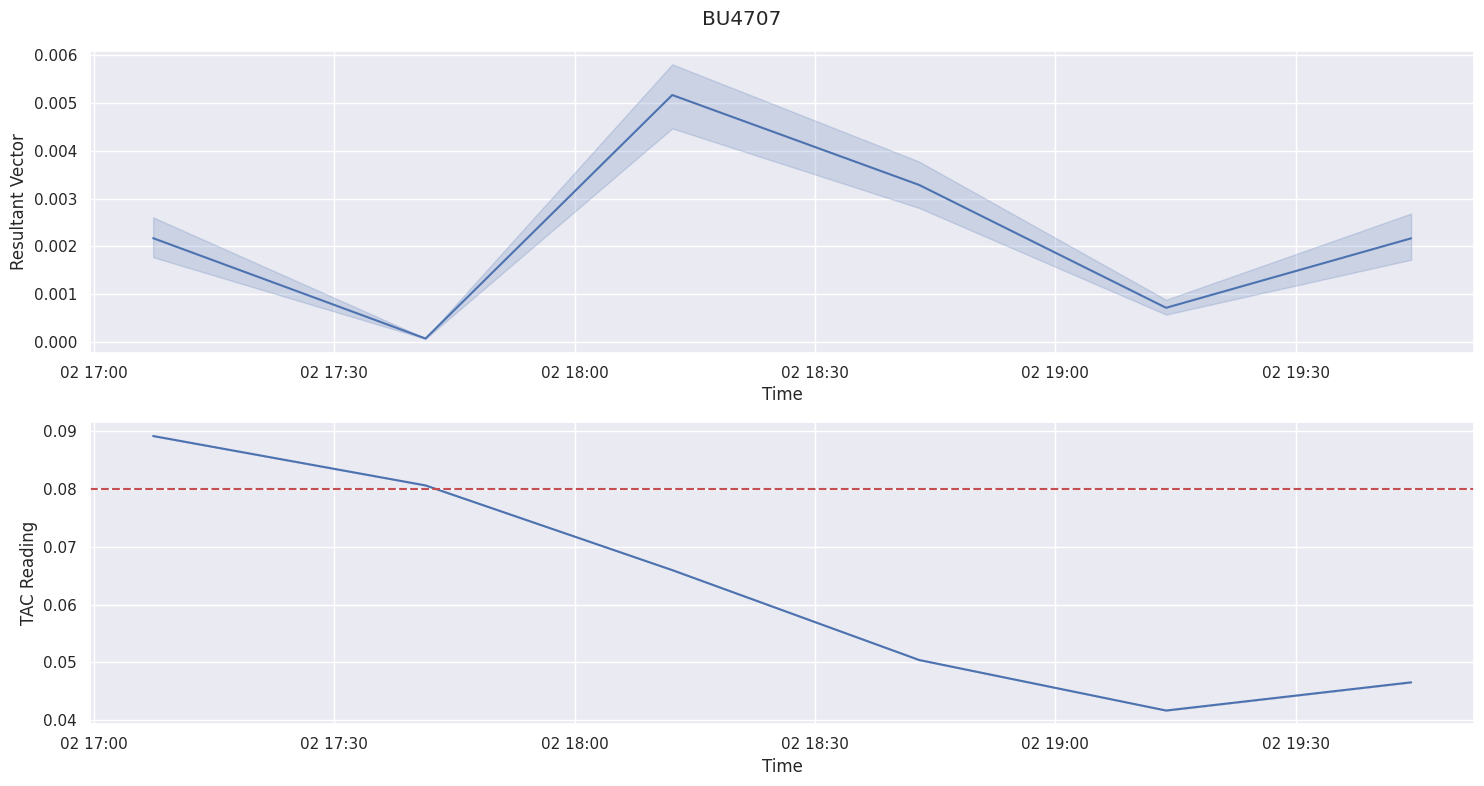

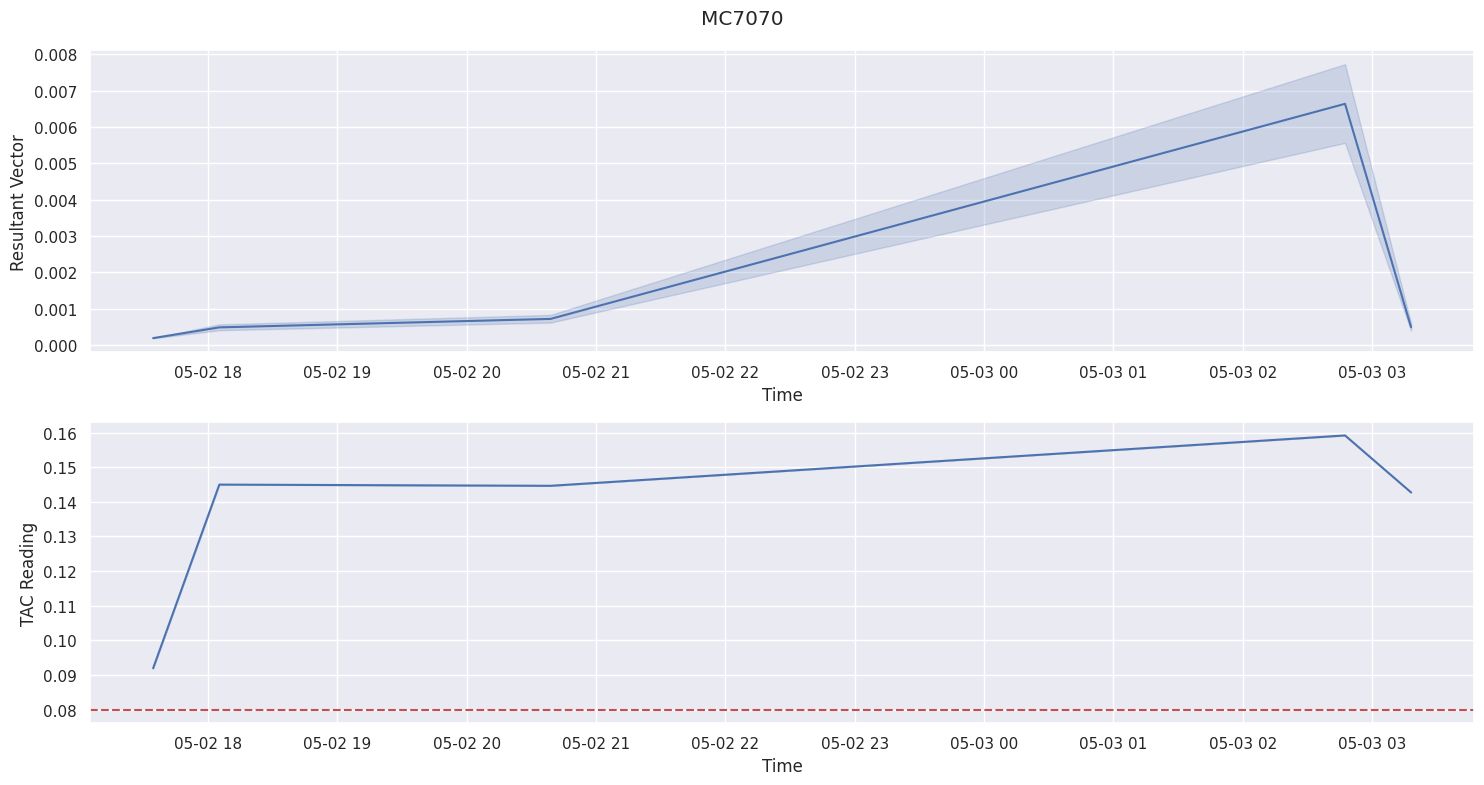

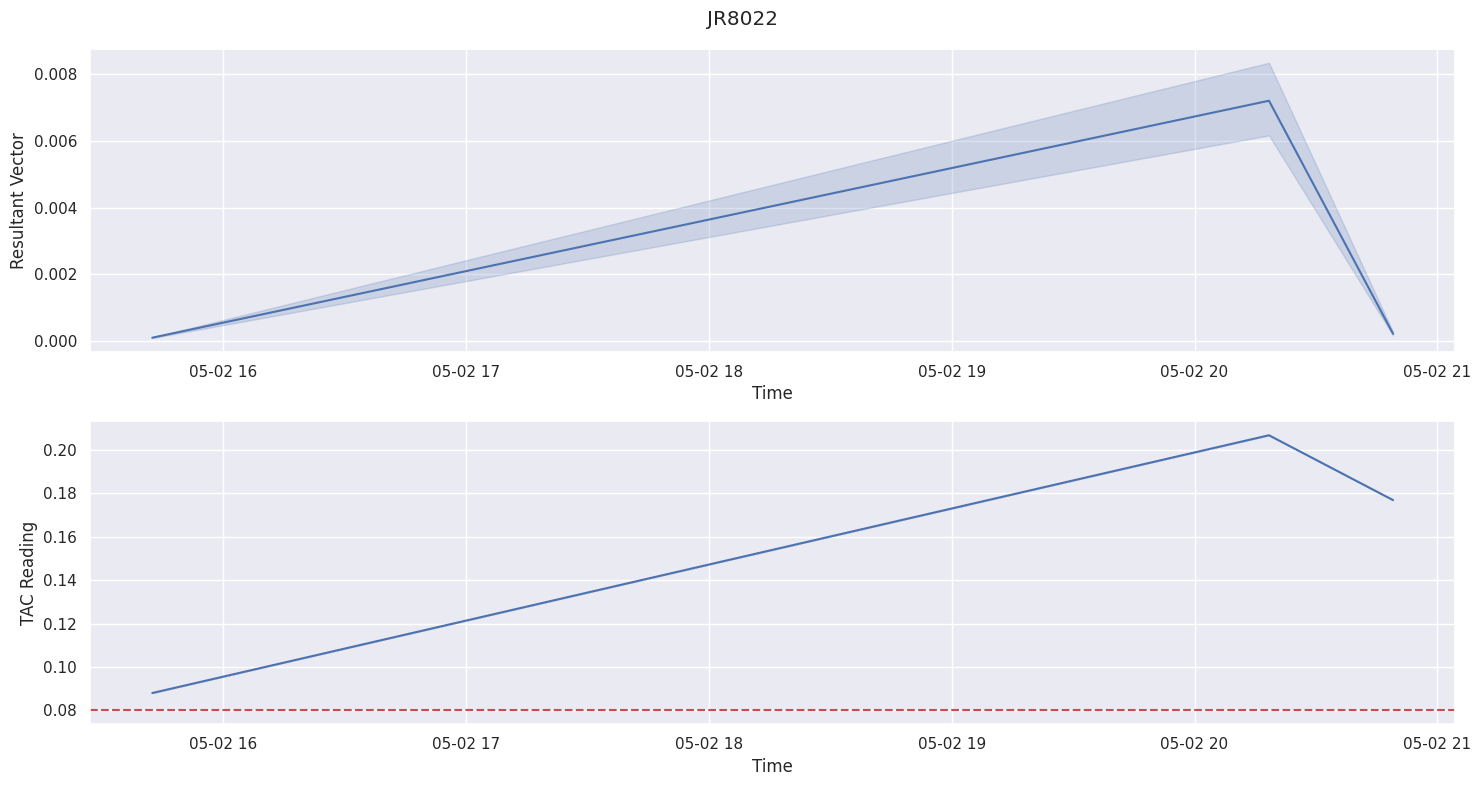

In [286]:
for x in index_values:

  sample_df = merged_df[(merged_df['pid']== x)]
  fig, axes = plt.subplots(nrows=2, figsize=(15,8))

  sns.lineplot(x=sample_df['timestamp'], y=sample_df['resultant_vector'] / 40, ax=axes[0])
  sns.lineplot(x=sample_df['timestamp'], y=sample_df['TAC_Reading'], ax=axes[1])

  # horizontal line at y = 0.08 in TAC chart
  axes[1].axhline(y=0.08, color='r', linestyle='--', label='0.08 TAC Value')

  fig.suptitle(f"{x}")

  axes[0].set_ylabel('Resultant Vector')
  axes[0].set_xlabel('Time')
  axes[1].set_ylabel('TAC Reading')
  axes[1].set_xlabel('Time')

  plt.tight_layout()
  plt.show()

#Segmentation on TAC values

In [287]:
merged_df_segmented = merged_df.sort_values(by=['pid', 'timestamp'])

# identify the instances of change in 'tac'.
TAC_change = merged_df_segmented.groupby('pid')['TAC_Reading'].transform(lambda x: x != x.shift())
# create segment IDs
merged_df_segmented['segment_id'] = TAC_change.astype(int).cumsum()
merged_df_segmented['segment_id']= merged_df_segmented.groupby('pid')['segment_id'].transform(lambda x: x - x.min())

In [288]:
merged_df_segmented[merged_df_segmented['pid']== 'PC6771']

,pid,x,y,z,timestamp,TAC_Reading,resultant_vector,segment_id
22,PC6771,-0.0012,-0.0008,0.0036,2017-05-02 14:49:03,0.069712,0.003878,0
23,PC6771,-0.0001,-0.0010,0.0043,2017-05-02 14:49:03,0.069712,0.004416,0
24,PC6771,0.0020,-0.0002,0.0026,2017-05-02 14:49:03,0.069712,0.003286,0
25,PC6771,-0.0006,-0.0006,0.0040,2017-05-02 14:49:03,0.069712,0.004089,0
26,PC6771,0.0025,-0.0006,0.0032,2017-05-02 14:49:03,0.069712,0.004105,0
...,...,...,...,...,...,...,...,...
5858,PC6771,0.0053,-0.0028,0.0264,2017-05-03 09:33:00,-0.004448,0.027072,18
5859,PC6771,-0.0020,-0.0011,0.0206,2017-05-03 09:33:00,-0.004448,0.020726,18
5860,PC6771,0.0042,-0.0021,0.0190,2017-05-03 09:33:00,-0.004448,0.019572,18
5861,PC6771,0.0050,-0.0021,0.0280,2017-05-03 09:33:00,-0.004448,0.028520,18


In [289]:
# 'segment_id' count for each group
total_segment = merged_df_segmented.groupby(['pid', 'TAC_Reading'])['segment_id'].count().reset_index(name='total_segment')
print(total_segment)

        pid  TAC_Reading  total_segment
0    BK7610     0.041689             40
1    BK7610     0.046559             40
2    BK7610     0.050424             40
3    BK7610     0.065357             39
4    BK7610     0.065953             40
..      ...          ...            ...
157  SF3079     0.107148             40
158  SF3079     0.130305             40
159  SF3079     0.135561             39
160  SF3079     0.159026             39
161  SF3079     0.171436             40

[162 rows x 3 columns]


# Ordinal Pattern

In [290]:
from itertools import permutations

#Calculate ordinal pattern

def ordinal_pattern (x, dim):
  ordinal_numbers = list(range(dim))
  patterns_possible = list (permutations (ordinal_numbers))
  counts = np.zeros(len(patterns_possible), dtype=int)

  for i in range(len(x) - dim + 1):
    temp = x[i:i+dim]
    sorted_indices = tuple(np.argsort(temp))
    pattern_index = patterns_possible.index(sorted_indices)
    counts[pattern_index] += 1
  return counts

In [291]:
#Apply ordinal pattern to each individual in each segment
dim = 3 # Embedding dimension
counts_by_segment = merged_df_segmented.groupby(['pid','segment_id'])['resultant_vector'].apply(lambda x: ordinal_pattern(x, dim))
print (counts_by_segment)

pid     segment_id
BK7610  0              [8, 5, 3, 5, 4, 12]
        1              [4, 8, 10, 3, 5, 8]
        2              [11, 4, 5, 7, 8, 3]
        3             [12, 2, 3, 4, 6, 11]
        4              [13, 3, 3, 4, 4, 9]
                              ...         
SF3079  4              [10, 4, 3, 9, 7, 5]
        5               [7, 5, 4, 8, 6, 7]
        6               [4, 7, 8, 4, 6, 9]
        7              [9, 6, 5, 4, 3, 10]
        8             [12, 2, 2, 5, 6, 10]
Name: resultant_vector, Length: 162, dtype: object


# Shannon Entropy

In [292]:
def shannon_entropy(prob_dist):
  prob_dist = prob_dist[prob_dist > 0] #to avoid log(0)
  entropy = -np.sum(prob_dist * np.log2(prob_dist))
  return entropy

# Permutation Entropy

In [293]:
def permutation_entropy(op):

  op = np.array(op, dtype=float)
  probabilities = op / np.sum(op)
  shannon_entropy_of_pd = shannon_entropy(probabilities)
  num_patterns = len(op)
  max_entropy = np.log2(num_patterns)
  normalized_permutation_entropy = shannon_entropy_of_pd / max_entropy # to Normalize
  return normalized_permutation_entropy

# Complexity

In [294]:
def complexity (op):

    pe = permutation_entropy(op)
    constant1 = (0.5+((1 - 0.5)/len(op)))* np.log(0.5+((1 - 0.5)/len(op)))
    constant2 = ((1 - 0.5)/len(op))*np.log((1 - 0.5)/len(op))*(len(op) - 1)
    constant3 = 0.5*np.log(len(op))
    Q_o = -1/(constant1+constant2+constant3)

    temp_op_prob = np.divide(op, sum(op))
    temp_op_prob2 = (0.5*temp_op_prob)+(0.5*(1/len(op)))
    JSdivergence = (shannon_entropy(temp_op_prob2) - 0.5 * shannon_entropy(temp_op_prob) - 0.5 * np.log(len(op)))
    Comp_JS = Q_o * JSdivergence * pe
    return(Comp_JS)

# Permuation Entropy and Complexity for each segment

In [295]:
calculated_permutation_entropy = {}
calculated_complexity = {}
for index, pattern_counts in counts_by_segment.items():
  pid, segment_id = index
  calculated_pe = permutation_entropy(pattern_counts)
  calculated_comp = complexity(pattern_counts)
  calculated_permutation_entropy[index] = calculated_pe
  calculated_complexity[index] = calculated_comp

# Results

In [296]:
print(calculated_permutation_entropy)

{('BK7610', 0): 0.9384427636873285, ('BK7610', 1): 0.9552967307039063, ('BK7610', 2): 0.9503495825812311, ('BK7610', 3): 0.8967175301700968, ('BK7610', 4): 0.902360862481398, ('BK7610', 5): 0.9100123932767151, ('BK7610', 6): 0.9960197593954816, ('BK7610', 7): 0.9860384480400781, ('BK7610', 8): 0.8509636993690404, ('BK7610', 9): 0.9700057238624978, ('BK7610', 10): 0.8765500685215617, ('BK7610', 11): 0.8873833515146428, ('BK7610', 12): 0.986238261487513, ('BK7610', 13): 0.905153120223003, ('BK7610', 14): 0.8509636993690404, ('BK7610', 15): 0.8842715289028856, ('BK7610', 16): 0.9457430857289653, ('BU4707', 0): 0.8941551447239732, ('BU4707', 1): 0.9542728714118537, ('BU4707', 2): 0.8910943691742046, ('BU4707', 3): 0.9372323588006967, ('BU4707', 4): 0.9692935913627072, ('BU4707', 5): 0.9328323814477827, ('CC6740', 0): 0.863173161693871, ('CC6740', 1): 0.9700057238624978, ('CC6740', 2): 0.9839330922873069, ('CC6740', 3): 0.9775277211118096, ('CC6740', 4): 0.9745703937213608, ('CC6740', 5): 0

In [297]:
print(calculated_complexity)

{('BK7610', 0): 0.8999827966160039, ('BK7610', 1): 0.897094273355872, ('BK7610', 2): 0.8980319824493553, ('BK7610', 3): 0.9180891907723376, ('BK7610', 4): 0.909701693539696, ('BK7610', 5): 0.9075053510863645, ('BK7610', 6): 0.8759954452694687, ('BK7610', 7): 0.8818078710284754, ('BK7610', 8): 0.9228388285843803, ('BK7610', 9): 0.8896145949438827, ('BK7610', 10): 0.928815152707199, ('BK7610', 11): 0.930145552998629, ('BK7610', 12): 0.881480178560082, ('BK7610', 13): 0.91510577271964, ('BK7610', 14): 0.9228388285843803, ('BK7610', 15): 0.918012448583421, ('BK7610', 16): 0.9052454194275623, ('BU4707', 0): 0.9177904394253782, ('BU4707', 1): 0.8956530390649207, ('BU4707', 2): 0.9282313868280905, ('BU4707', 3): 0.9080085408625987, ('BU4707', 4): 0.89124950540858, ('BU4707', 5): 0.9047728504555862, ('CC6740', 0): 0.9645389805701998, ('CC6740', 1): 0.8896145949438827, ('CC6740', 2): 0.882734545504837, ('CC6740', 3): 0.8855752320657102, ('CC6740', 4): 0.8875018304976793, ('CC6740', 5): 0.920148

# Update DataFrame with results

In [298]:
merged_df_segmented['permutation_entropy'] = np.nan
for (pid, segment_id), entropy in calculated_permutation_entropy.items():
  merged_df_segmented.loc[(merged_df_segmented['pid'] == pid) & (merged_df_segmented['segment_id'] == segment_id), 'permutation_entropy'] = entropy

merged_df_segmented['complexity'] = np.nan

for (pid, segment_id), complexity in calculated_complexity.items():
  merged_df_segmented.loc[(merged_df_segmented['pid'] == pid) & (merged_df_segmented['segment_id'] == segment_id), 'complexity'] = complexity
merged_df_segmented

,pid,x,y,z,timestamp,TAC_Reading,resultant_vector,segment_id,permutation_entropy,complexity
62,BK7610,0.1410,-0.2686,-0.1372,2017-05-02 14:57:26,0.065357,0.332943,0,0.938443,0.899983
63,BK7610,0.1714,-0.2722,-0.1208,2017-05-02 14:57:26,0.065357,0.343604,0,0.938443,0.899983
64,BK7610,0.3328,-0.1353,-0.2548,2017-05-02 14:57:26,0.065357,0.440437,0,0.938443,0.899983
65,BK7610,0.2822,-0.0375,-0.2816,2017-05-02 14:57:26,0.065357,0.400427,0,0.938443,0.899983
66,BK7610,0.1847,0.1813,-0.2680,2017-05-02 14:57:26,0.065357,0.372569,0,0.938443,0.899983
...,...,...,...,...,...,...,...,...,...,...
3851,SF3079,0.1188,0.0456,-0.0480,2017-05-03 03:15:46,0.159026,0.136003,8,0.892810,0.922106
3852,SF3079,0.1342,-0.0594,0.1822,2017-05-03 03:15:46,0.159026,0.233955,8,0.892810,0.922106
3853,SF3079,0.1356,-0.0877,0.1830,2017-05-03 03:15:46,0.159026,0.244065,8,0.892810,0.922106
3854,SF3079,0.1117,-0.0822,0.0917,2017-05-03 03:15:46,0.159026,0.166261,8,0.892810,0.922106


# Visualizing Permutation Entropy, Complexity and TAC Reading over time

<ipython-input-309-655b7f0a08a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


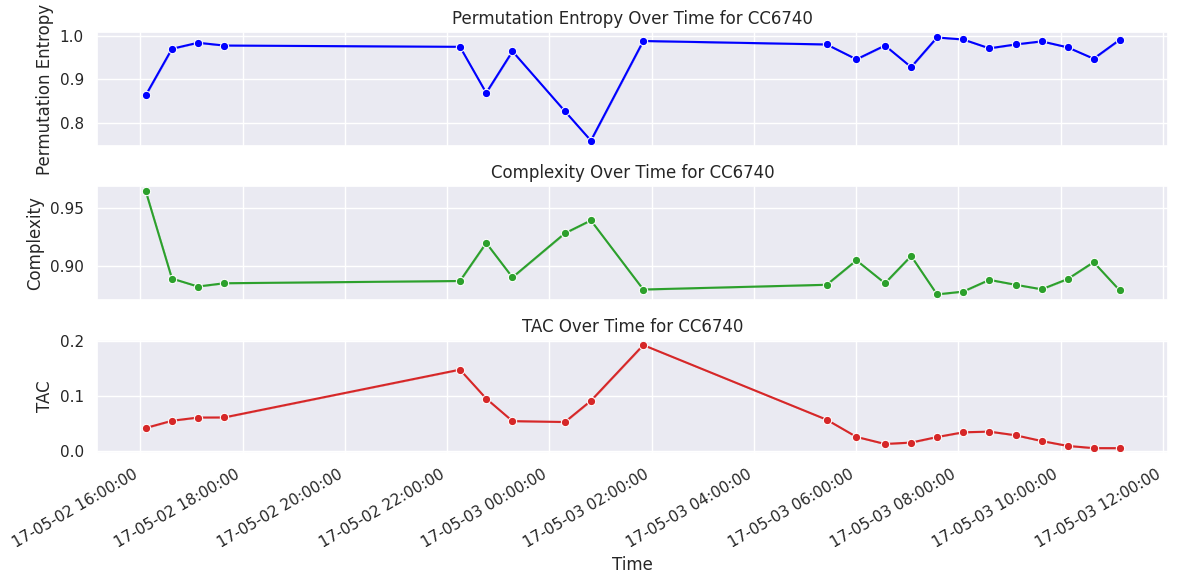

<ipython-input-309-655b7f0a08a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


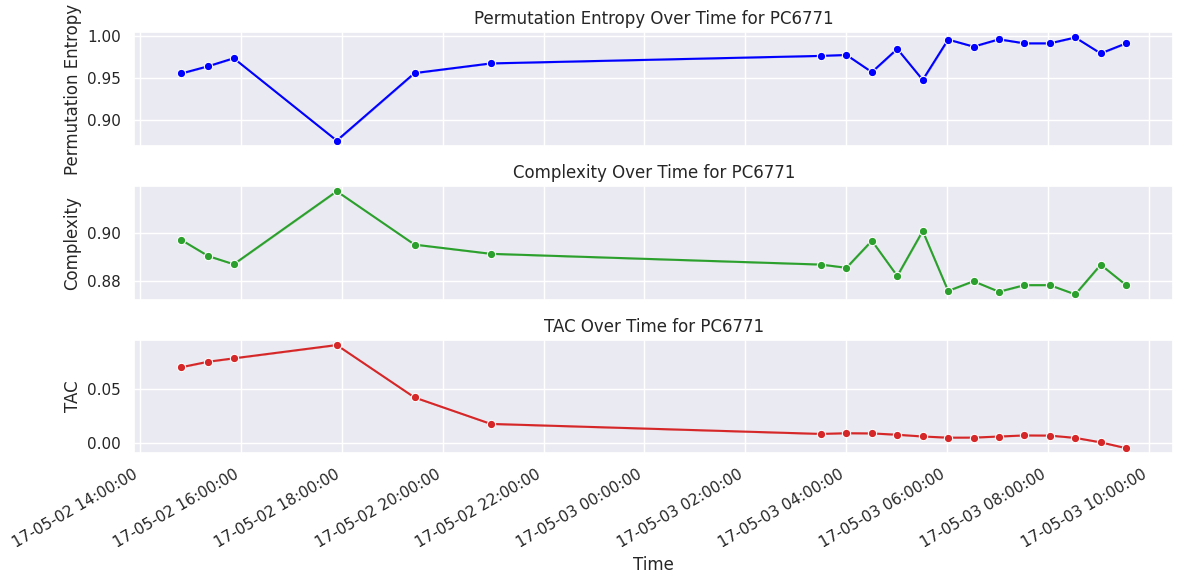

<ipython-input-309-655b7f0a08a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


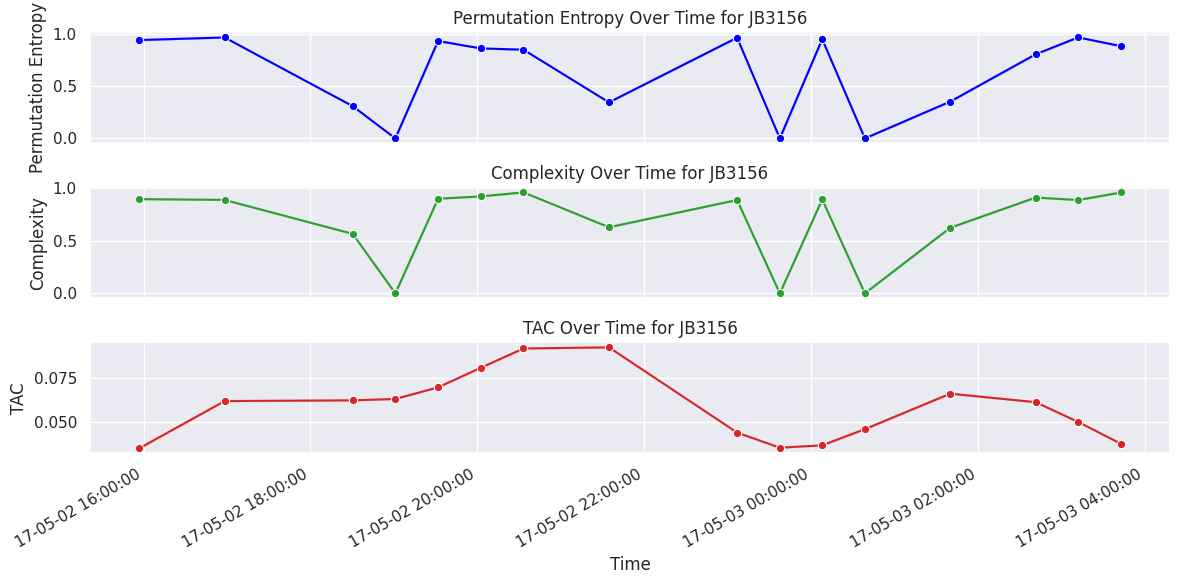

<ipython-input-309-655b7f0a08a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


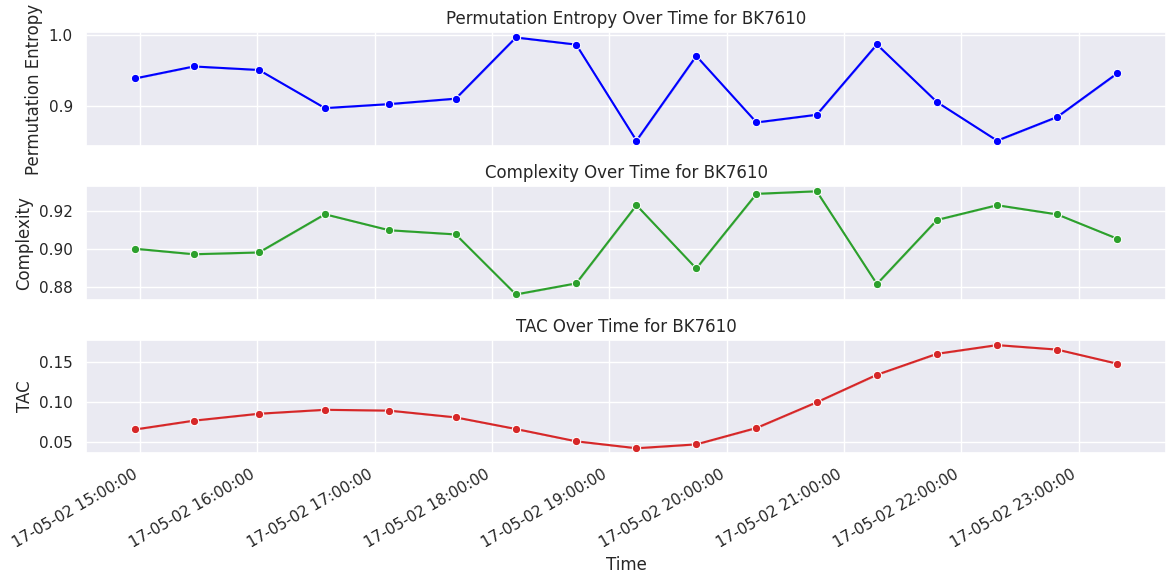

<ipython-input-309-655b7f0a08a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


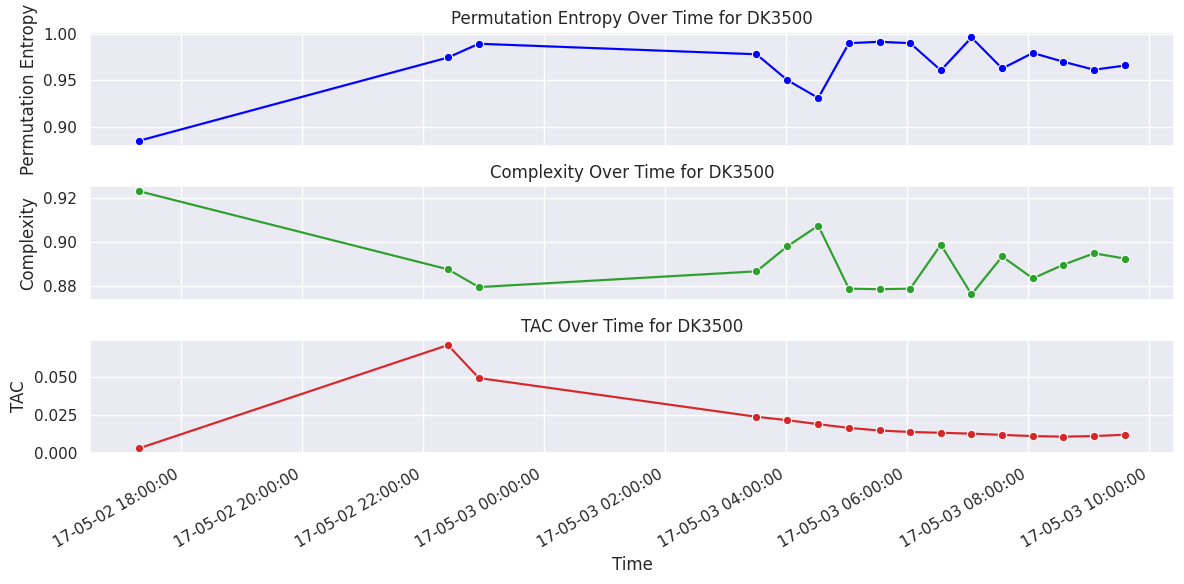

<ipython-input-309-655b7f0a08a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


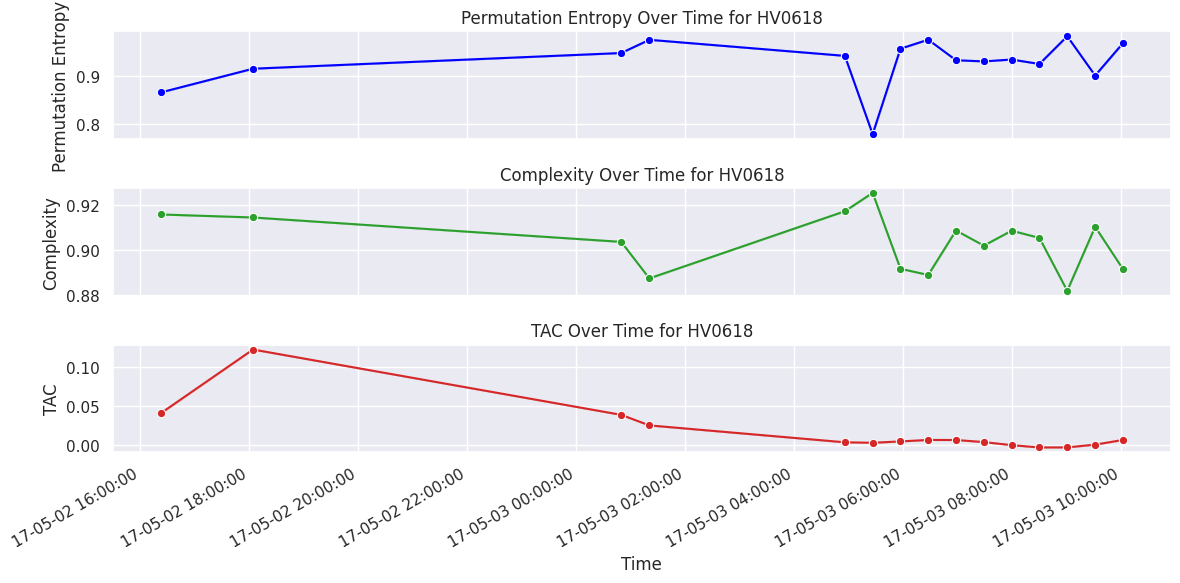

<ipython-input-309-655b7f0a08a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


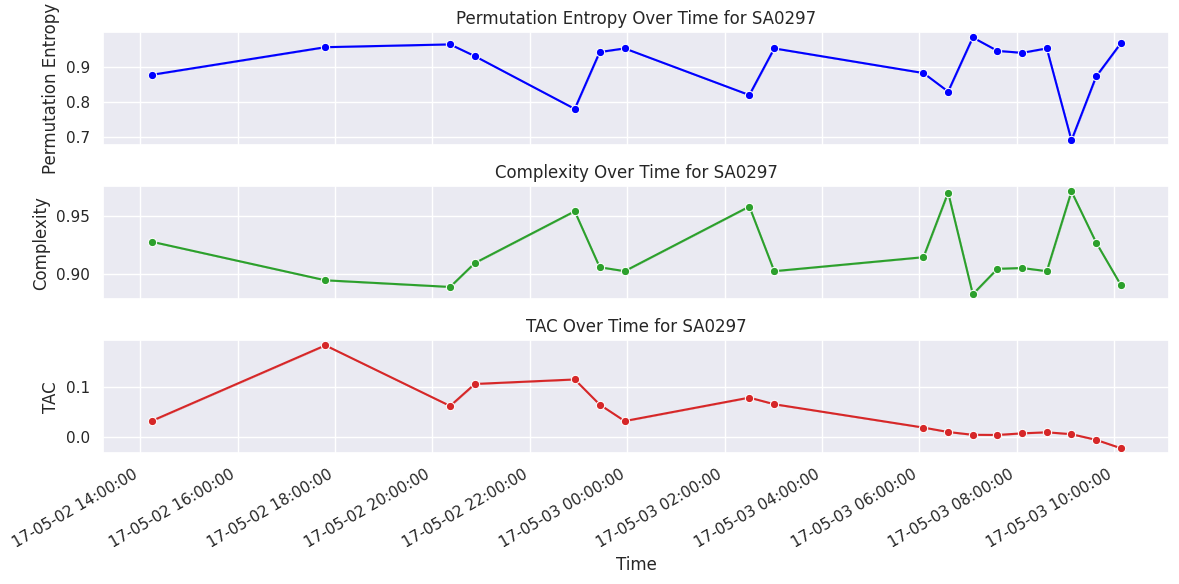

<ipython-input-309-655b7f0a08a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


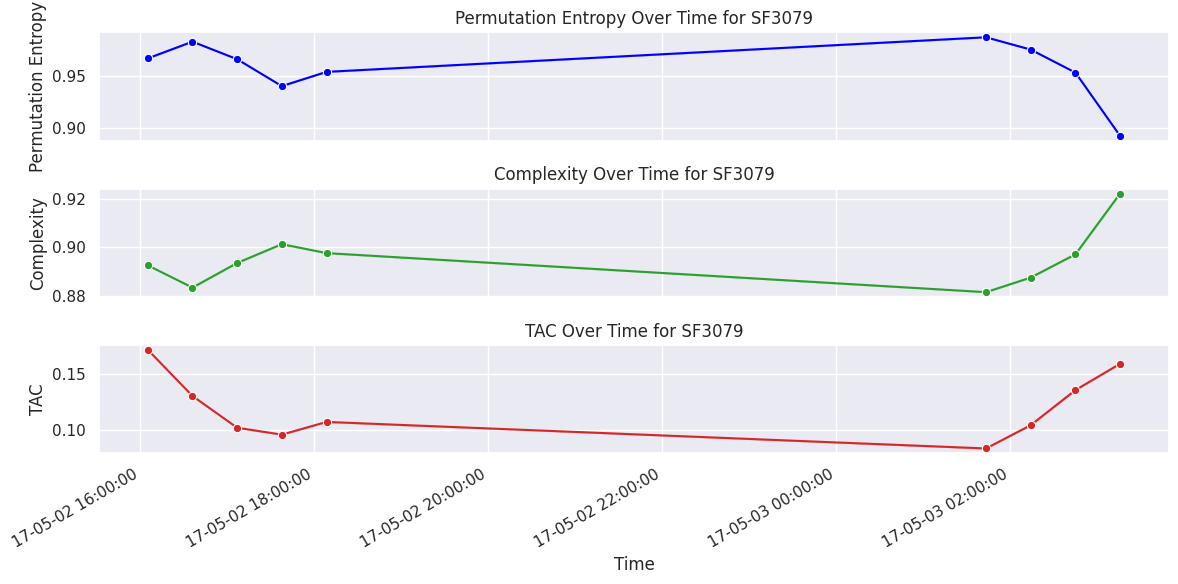

<ipython-input-309-655b7f0a08a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


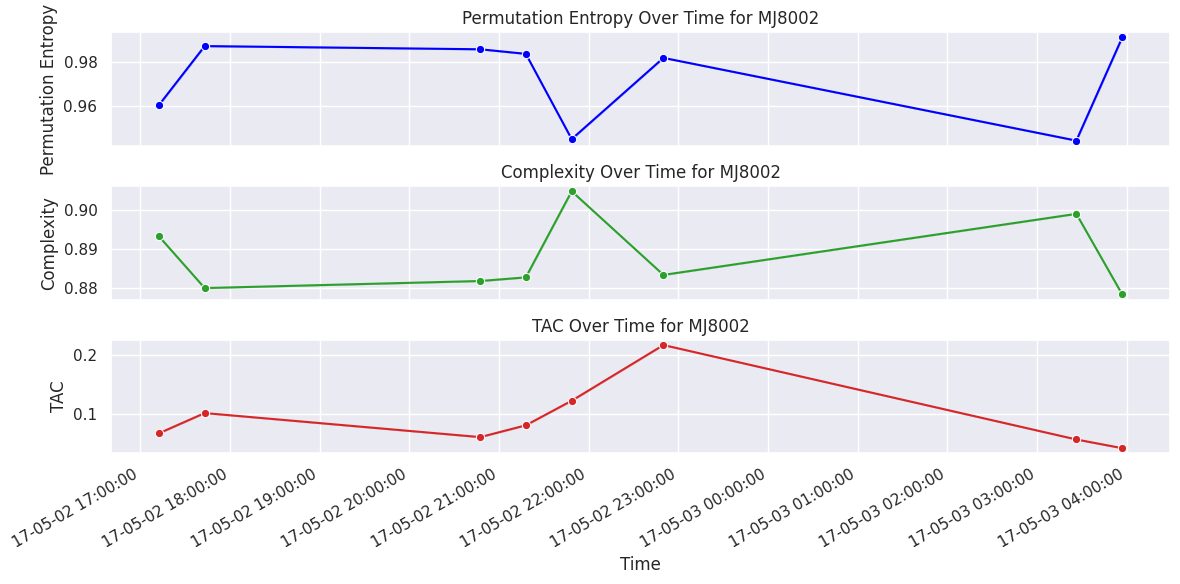

<ipython-input-309-655b7f0a08a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


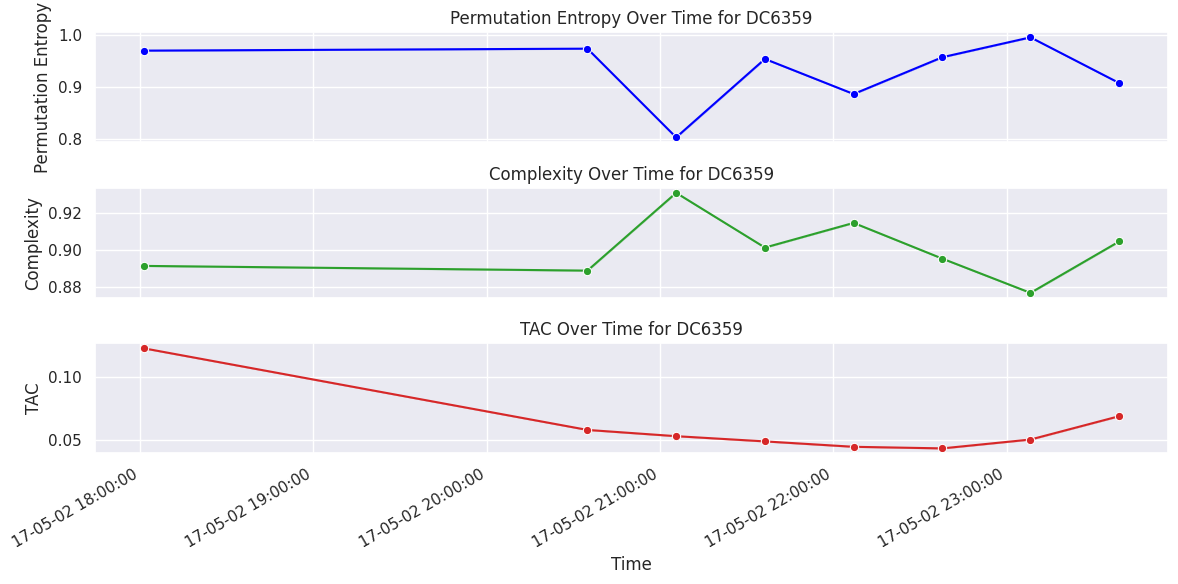

<ipython-input-309-655b7f0a08a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


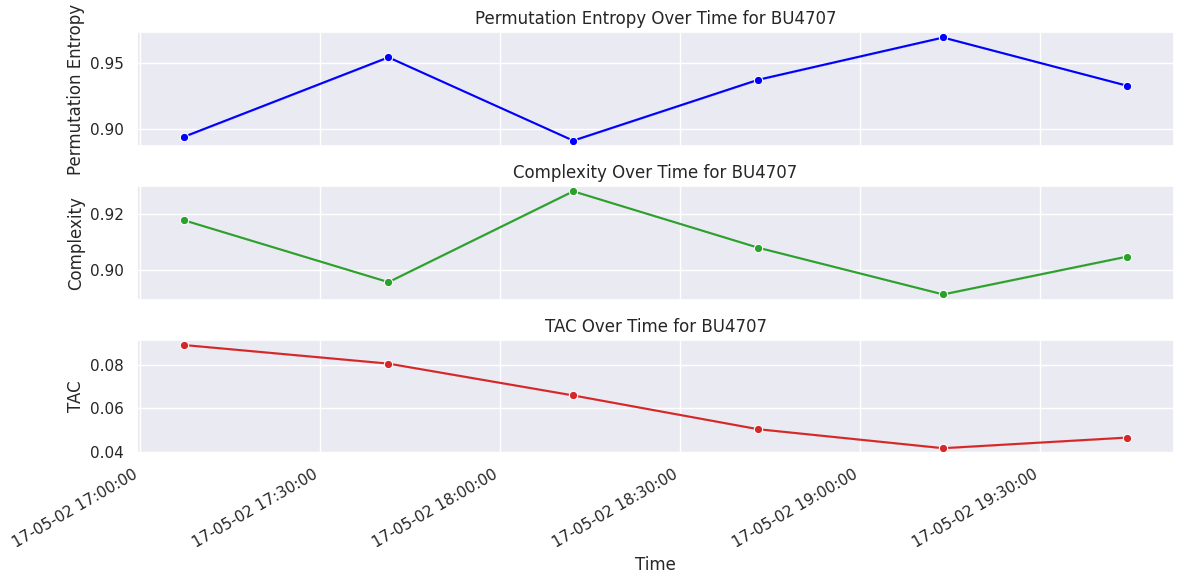

<ipython-input-309-655b7f0a08a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


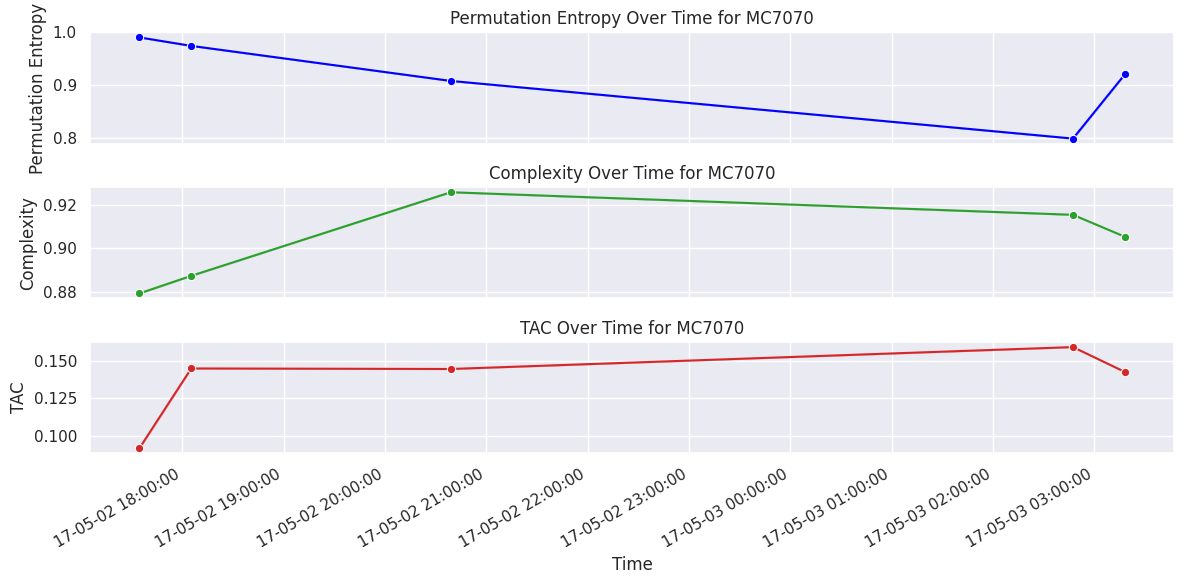

<ipython-input-309-655b7f0a08a6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'])


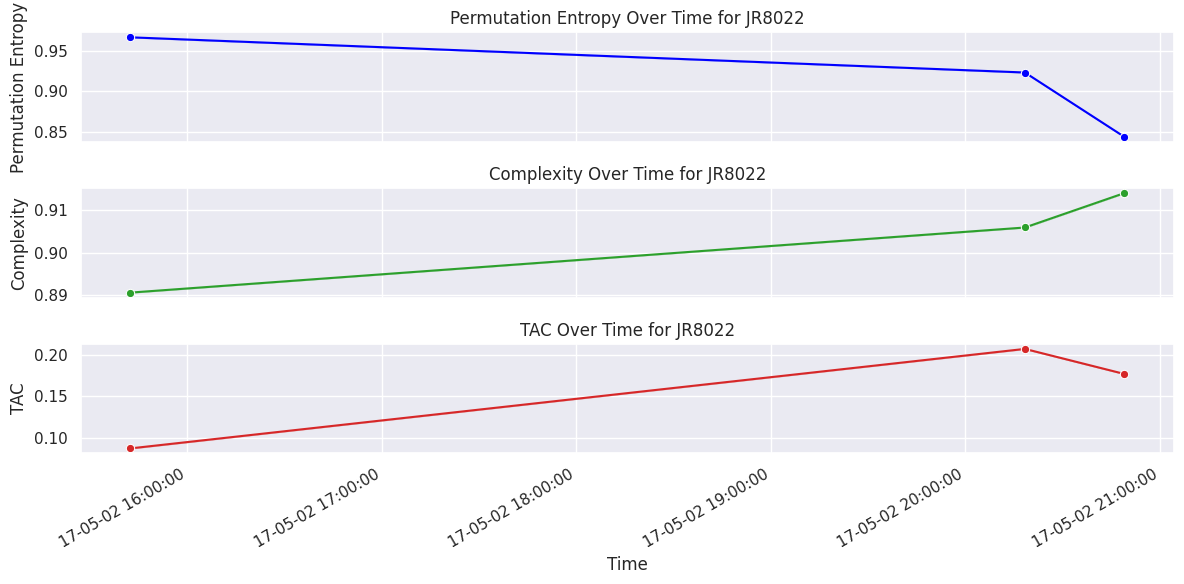

In [309]:
for pid in index_values:
    df = merged_df_segmented[merged_df_segmented['pid'] == pid]
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    sns.set(style="darkgrid")

    fig, axs = plt.subplots(3, 1, figsize=(12, 6), sharex=True)

    sns.lineplot(ax=axs[0], data=df, x='timestamp', y='permutation_entropy', marker='o', color="blue")
    axs[0].set_title(f'Permutation Entropy Over Time for {pid}')
    axs[0].set_ylabel('Permutation Entropy')

    sns.lineplot(ax=axs[1], data=df, x='timestamp', y='complexity', marker='o', color="tab:green")
    axs[1].set_title(f'Complexity Over Time for {pid}')
    axs[1].set_ylabel('Complexity')

    sns.lineplot(ax=axs[2], data=df, x='timestamp', y='TAC_Reading', marker='o', color="tab:red")
    axs[2].set_title(f'TAC Over Time for {pid}')
    axs[2].set_ylabel('TAC')

    plt.xlabel('Time')
    plt.gcf().autofmt_xdate()
    date_format = DateFormatter("%y-%m-%d %H:%M:%S")
    axs[2].xaxis.set_major_formatter(date_format)

    plt.tight_layout()
    plt.show()

# Permutation Entropy vs Complexity


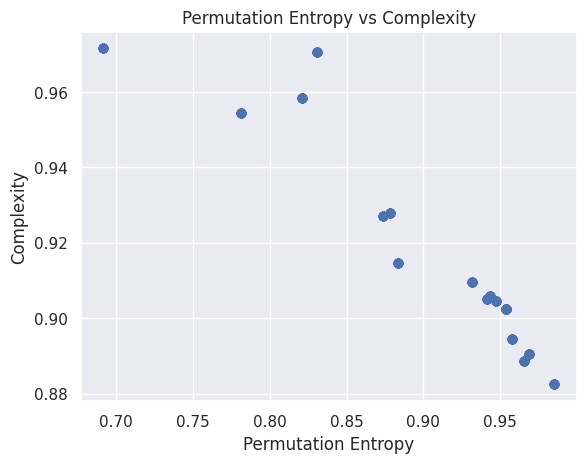

In [308]:
# for 1 pid
df_sa0297 = merged_df_segmented[merged_df_segmented['pid'] == 'SA0297']
plt.scatter(df_sa0297['permutation_entropy'], df_sa0297['complexity'])
plt.title('Permutation Entropy vs Complexity')
plt.xlabel('Permutation Entropy')
plt.ylabel('Complexity')
plt.show()

# Conclusion

Looking at the graphs, pids - CC6740, PC6771, JB3156, BK7610, DK3500, HV0618, SA0297 seem to be intoxicated.

**As TAC levels fall (suggesting decreasing alcohol effects), complexity might reduce and entropy may rise, indicating more predictable or stable behavior. However, there is a lack of a clear inverse relationship here.**


Permutation Entropy and Complexity does have some correlation based on the intoxication levels but since they do not have individual thresholds, they might not be the most accurate methods to classify between intoxicated and sober.